In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')

---
---
---
# Dataframe Modeling
## Manipulating Dataset to achieve best model performance
---
### Fixing NaN values, dropping unnecessary columns and creating new features

In [316]:
df1 = df.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [317]:
df1 = df1.drop(['area_type', 'availability','society'],axis=1)
df1.head(1)

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07


In [318]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12710 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12710 non-null  object 
 1   size        12710 non-null  object 
 2   total_sqft  12710 non-null  object 
 3   bath        12710 non-null  float64
 4   balcony     12710 non-null  float64
 5   price       12710 non-null  float64
dtypes: float64(3), object(3)
memory usage: 695.1+ KB


In [267]:
print(len(df1.location.unique()))
df1.location = df1.location.map(lambda x: x.strip())
len(df1.location.unique())

1265


1254

In [321]:
df2 = df1.copy()
print(df2.shape)
def subs(x):
    try:
        numbers = [float(num) for num in x.split(' - ')]
        return np.mean(numbers)
    except:
        return None
df2.total_sqft = df2.total_sqft.map(subs)
df2 = df2.dropna()
print(df2.shape)
df2.info()

(12710, 6)
(12668, 6)
<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    12668 non-null  object 
 1   size        12668 non-null  object 
 2   total_sqft  12668 non-null  float64
 3   bath        12668 non-null  float64
 4   balcony     12668 non-null  float64
 5   price       12668 non-null  float64
dtypes: float64(4), object(2)
memory usage: 692.8+ KB


In [322]:
df3 = df2.copy()
df3['price_p_sqft'] = 100000*(df3.price/df3.total_sqft)
df3.head()

,location,size,total_sqft,bath,balcony,price,price_p_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,4250.000000


In [340]:
df4 = df3.copy()
df4['size'] = df4['size'].map(lambda x: int(x.split(' ')[0]))
df4.rename(columns={'size':'bedrooms'}, inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12668 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      12668 non-null  object 
 1   bedrooms      12668 non-null  int64  
 2   total_sqft    12668 non-null  float64
 3   bath          12668 non-null  float64
 4   balcony       12668 non-null  float64
 5   price         12668 non-null  float64
 6   price_p_sqft  12668 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 791.8+ KB


In [346]:
print(len(df4.location.value_counts()))
print(len((df4.location.value_counts()>10)[df4.location.value_counts()>10]))
locations_to_others = (df4.location.value_counts()<=10)[df4.location.value_counts()<=10].index
locations_to_others
df5=df4.copy()
df5.location = df5.location.map(lambda x: 'Other' if x in locations_to_others else x)

1259
235


---
### Verifying and removing outliers

In [347]:
df5.columns

Index(['location', 'bedrooms', 'total_sqft', 'bath', 'balcony', 'price',
       'price_p_sqft'],
      dtype='object')

In [348]:
import seaborn as sns
df5.describe()

,bedrooms,total_sqft,bath,balcony,price,price_p_sqft
count,12668.000000,12668.000000,12668.000000,12668.000000,12668.000000,1.266800e+04
mean,2.736422,1511.835167,2.616277,1.585649,105.952648,6.876277e+03
std,1.202643,1162.097276,1.223882,0.816758,131.813137,2.263354e+04
min,1.000000,5.000000,1.000000,0.000000,8.000000,2.678298e+02
25%,2.000000,1100.000000,2.000000,1.000000,49.015000,4.242721e+03
50%,3.000000,1260.000000,2.000000,2.000000,70.000000,5.376344e+03
75%,3.000000,1640.000000,3.000000,2.000000,115.000000,7.142857e+03
max,43.000000,52272.000000,40.000000,3.000000,2912.000000,2.300000e+06


## Basic statistical outlier removal
 * ### Remove explicit strange numbers

<Axes: >

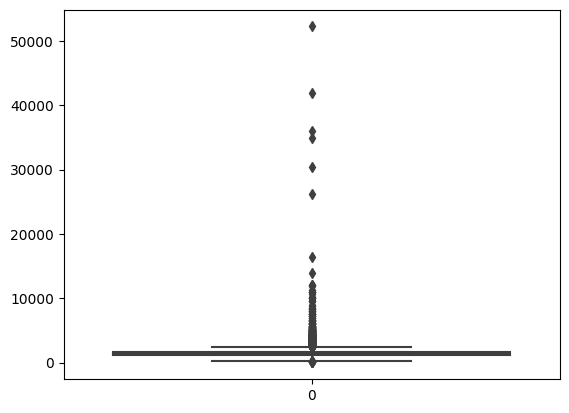

In [349]:
sns.boxplot(df5.total_sqft)

<Axes: >

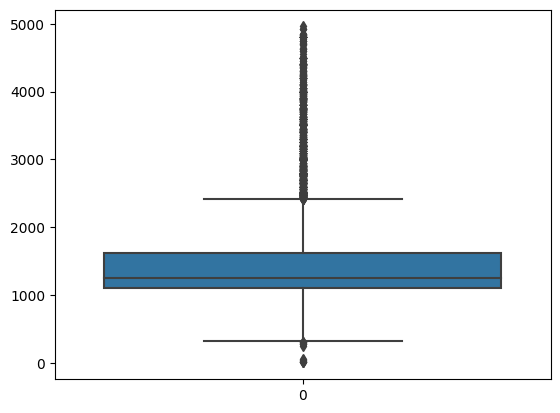

In [19]:
from scipy import stats
def remove_3z(df1,col):
    df = df1.copy()
    z_scores = abs((df[col]-df[col].mean())/df[col].std())
    df['z'] = z_scores
    return df[df['z']<3].drop('z',axis=1)
df6 = remove_3z(df5,'total_sqft')
sns.boxplot(df6.total_sqft)

<Axes: >

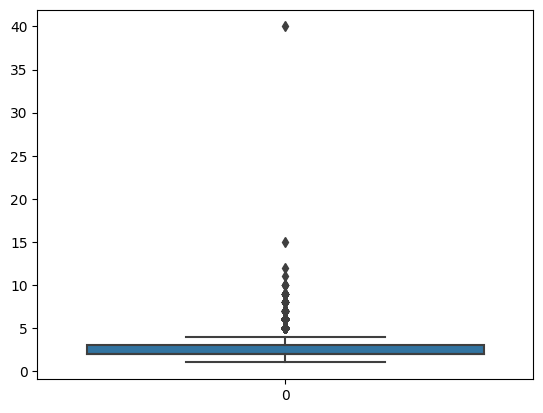

In [20]:
sns.boxplot(df6.bath)

<Axes: >

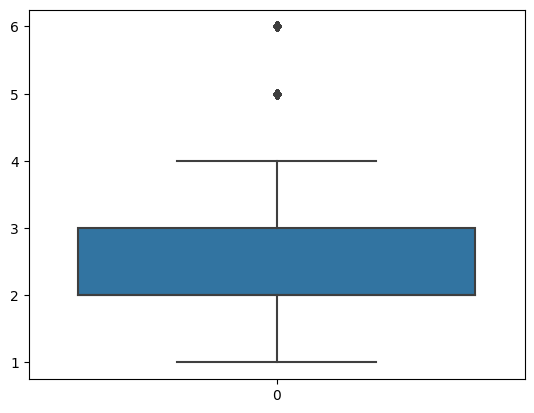

In [21]:
df7 = remove_3z(df6,'bath')
sns.boxplot(df7.bath)

In [362]:
df7.describe()

,bedrooms,total_sqft,bath,balcony,price,price_p_sqft
count,12422.000000,12422.000000,12422.000000,12422.000000,12422.000000,12422.000000
mean,2.660522,1446.797206,2.532040,1.579375,99.323229,6600.320908
std,0.974740,658.461447,0.979656,0.809494,98.905910,9876.930097
min,1.000000,11.000000,1.000000,0.000000,8.000000,500.000000
25%,2.000000,1097.000000,2.000000,1.000000,48.950000,4230.769231
50%,3.000000,1255.000000,2.000000,2.000000,69.000000,5335.439973
75%,3.000000,1615.750000,3.000000,2.000000,110.000000,7064.841052
max,12.000000,4960.000000,6.000000,3.000000,2250.000000,672727.272727


<Axes: >

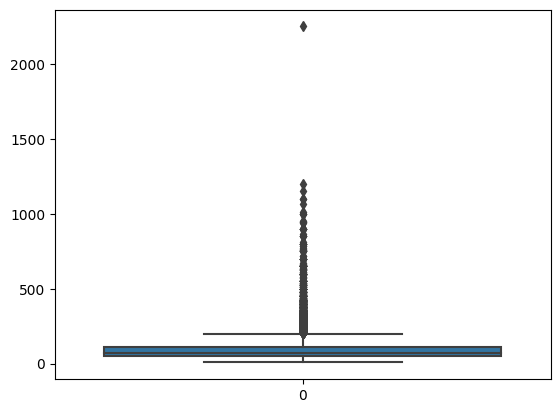

In [22]:
sns.boxplot(df7.price)

<Axes: >

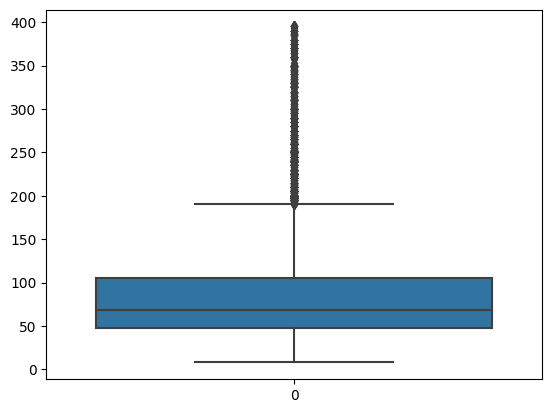

In [23]:
df8 = remove_3z(df7,'price')
sns.boxplot(df8.price)

## Domain outlier removal 
 * ### Understanding what makes sense and what doesn't make sense based on domain knowledge

### Removing houses with too much bathrooms
 * We should remove instances where the nº of bathrooms > nº of bedrooms + 2

In [366]:
df9 = df8.copy()
print(df8.shape)
df9 = df9[df8['bath']<df9['bedrooms']+2]
print(df9.shape)

(12147, 7)
(12060, 7)


### Removing houses with too little space for bedrooms
* Houses with less than 300 sqft/bedroom are too inconsistent with reality

In [39]:
df9['sqft_p_bedroom'] = df9.total_sqft/df9.bedrooms
print(df9.shape)
df10 = df9[df9['sqft_p_bedroom']>300]
print(df10.shape)

(12060, 8)
(11343, 8)


(11343, 8)


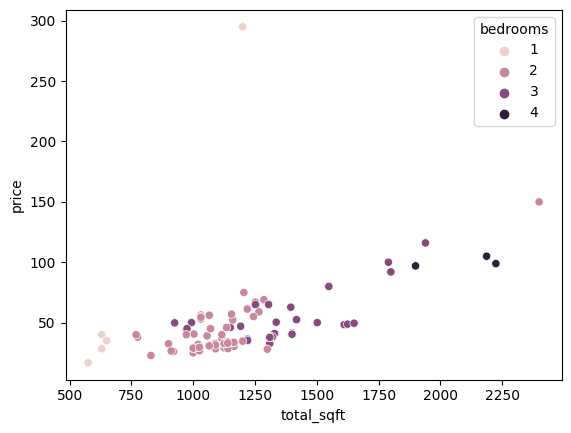

In [25]:
df11=df10.copy()
sns.scatterplot(df11[df11.location=='Electronic City Phase II'],x='total_sqft',y='price',hue='bedrooms')
print(df11.shape)

[1 2 3 4]
[83.02000000000001, 40.25328767123288, 48.56431818181818, 100.29333333333334]


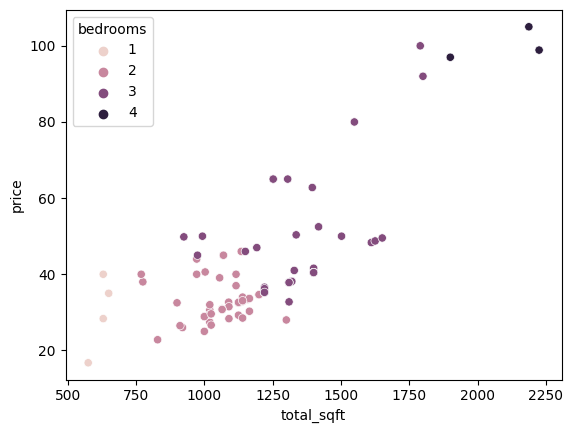

In [30]:
dfs=[]
for local in df11.location.unique():
    bedrooms = np.sort(df11[df11.location==local].bedrooms.unique())
    means = []
    for i, bedroom in enumerate(bedrooms):
        means.append(df11[(df11.location==local) & (df11.bedrooms==bedroom)].price.mean())
        if i>0:
            dfs.append(df11[(df11.location==local) & (df11.bedrooms==bedrooms[i-1]) & (df11.price<means[i])])
        if i==len(bedrooms)-1:
            dfs.append(df11[(df11.location==local) & (df11.bedrooms==bedroom)])
    if local=='Electronic City Phase II':
        print(bedrooms)
        print(means)
df12 = pd.concat(dfs)
ax = sns.scatterplot(df12[df12.location=='Electronic City Phase II'],x='total_sqft',y='price',hue='bedrooms')

In [33]:
print(df12.shape)
print(df12.columns)

(10335, 8)
Index(['location', 'bedrooms', 'total_sqft', 'bath', 'balcony', 'price',
       'price_p_sqft', 'sqft_p_bedroom'],
      dtype='object')


In [3]:
df_to_test = df13.drop(['price_p_sqft','price_sqftPbedroom','sqft_p_bedroom','balcony'],axis=1).copy()

<Axes: xlabel='total_sqft', ylabel='price'>

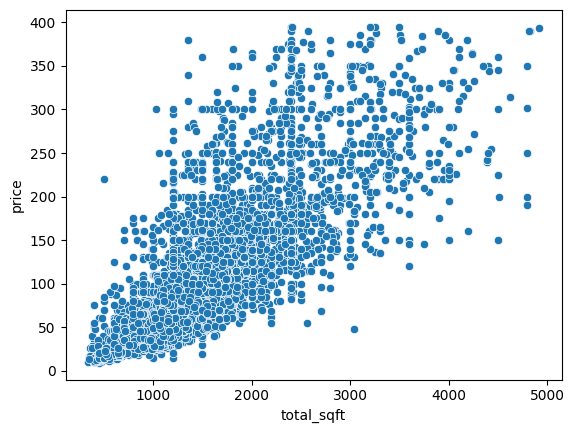

In [13]:
sns.scatterplot(df_to_test,x='total_sqft',y='price')

# *Testing models*
---
## OneHotEncoding

In [13]:
from sklearn.preprocessing import OneHotEncoder

def encode(df1,col):
    df = df1.copy()
    encoder = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
    dummies = encoder.fit_transform(df[[col]])
    dummies.columns = [col.replace('location_', '').strip() for col in dummies.columns]
    return pd.concat([df.drop(col,axis=1),dummies],axis=1)

In [113]:
df_test = encode(df_to_test,'location')

df_test2 = df_test.copy()
df_test2.columns = [x.lower() for x in df_test2.columns]
df_test2.to_excel('dataframe.xlsx',index=False)

In [114]:
df_test2

,bedrooms,total_sqft,bath,price,devarachikkanahalli,1st block jayanagar,1st phase jp nagar,2nd phase judicial layout,2nd stage nagarbhavi,5th phase jp nagar,...,vijayanagar,vishveshwarya layout,vishwapriya layout,vittasandra,whitefield,yelachenahalli,yelahanka,yelahanka new town,yelenahalli,yeshwanthpur
354,1,630.0,1.0,28.35,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,1,630.0,1.0,40.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10604,1,650.0,1.0,35.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12508,1,1200.0,1.0,295.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12637,1,575.0,1.0,16.75,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5551,4,2000.0,4.0,75.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9548,4,2000.0,3.0,90.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6094,6,2100.0,6.0,92.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10360,6,4000.0,6.0,230.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---
# Model Training

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

def X_y(df,y_col):
    return df.drop(y_col,axis=1), df[y_col]

def test_model(model,X,y):
    md = model
    cv = ShuffleSplit(n_splits=10,test_size=0.3,random_state=0)
    results = cross_val_score(model,X,y,cv=cv)
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    md.fit(X_train,y_train)
    return [results.mean() , results.std(), md.score(X_test, y_test), md]

def quick_test(model,X,y):
    md = model
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
    md.fit(X_train,y_train)
    return md.score(X_test, y_test)

In [116]:
X, y = X_y(df_test2,'price')

---
## Testing Models

In [117]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

LR_result = test_model(LinearRegression(),X,y)
DT_result = test_model(DecisionTreeRegressor(),X,y)
LassoR_result = test_model(Lasso(),X,y)

print(LR_result)
print(DT_result)
print(LassoR_result)

[-52060551516567.7, 156181654549705.22, 0.720587228145719, LinearRegression()]
[0.6358814596571163, 0.01455830154060347, 0.6350939768380771, DecisionTreeRegressor()]
[0.6305698880546406, 0.009328106350586358, 0.6415544728761182, Lasso()]


In [118]:
import pickle

with open('model.pkl', 'wb') as file:
    pickle.dump(LR_result[3], file)

In [119]:
import json

columns ={
    'data_cols': [col.lower() for col in X.columns]
}

with open('model_cols.json','w') as f:
    f.write(json.dumps(columns))